# Exploring simplices and cubes

Diagrammatic sets — the structure implemented by `rewalt`'s `DiagSet` class — support a wide variety of "shapes of diagrams", while remaining "topologically sound". This makes them a convenient tool for diagrammatic reasoning in higher category, higher algebra, and homotopy theory.

Among these shapes are some subclasses that are widely used on their own: in particular the *simplices* and the *cubes*. Indeed, both [simplicial sets](https://ncatlab.org/nlab/show/simplicial+set) and [cubical sets with connections](https://ncatlab.org/nlab/show/connection+on+a+cubical+set) are special cases of diagrammatic sets (their categories are full subcategories of the category of diagrammatic sets).

Reflecting this, `rewalt` contains a **full implementation of (finitely presented) simplicial sets and of (finitely presented) cubical sets with connections**.

And these are nothing more than diagrammatic sets whose generators all have simplicial and cubical shapes! The `Diagram` objects that have simplicial or cubical shapes come with special methods for constructing the simplicial and cubical faces, degeneracies, and connections.

These rely on implementations of subclasses of the `Shape` class. Since all our shapes have a "globular" orientation (half a boundary is "input", half a boundary is "output"), our simplices are in fact Street's [oriented simplices](https://ncatlab.org/nlab/show/oriental). Similarly our cubes are "oriented" as in [cubical ω-categories](https://arxiv.org/abs/math/0007009).

Understanding higher-dimensional oriented simplices and cubes can be difficult. In this notebook, we will try to use `rewalt` and its visualisation tools to get a grip on some low-but-not-too-low-dimensional examples.

## Oriented simplices

Oriented simplices of any dimension are built with the `Shapes.simplex` constructor. Let's start with the lowest possible dimension: -1.

In [1]:
import rewalt

# the next lines are only to avoid a jupyter warning; you can ignore them
rewalt.strdiags.DEFAULT['show'] = False
rewalt.hasse.DEFAULT['show'] = False

empty = rewalt.Shape.simplex(-1)

This is just the empty diagram shape.

In [2]:
len(empty)

0

The 0-dimensional simplex is just the point.

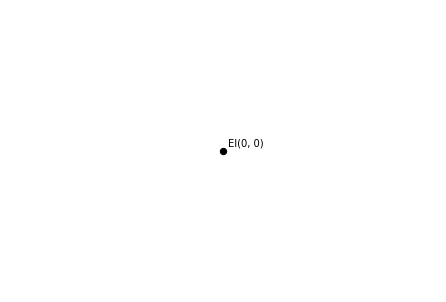

In [3]:
point = rewalt.Shape.simplex(0)
point.draw()

The oriented 1-dimensional simplex is an arrow.

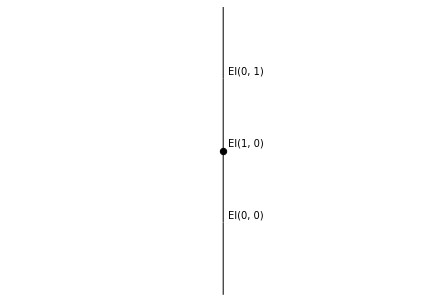

In [4]:
arrow = rewalt.Shape.simplex(1)
arrow.draw()

Things get a little more interesting in dimension 2. The oriented 2-simplex is a triangle with two output sides and one input side.

In string diagrams, it is, for example, the shape of a *comonoid comultiplication*.

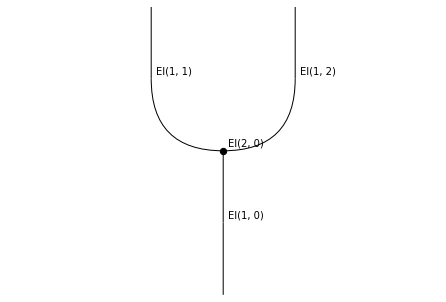

In [5]:
triangle = rewalt.Shape.simplex(2)
triangle.draw()

Let's go one dimension higher. The oriented 3-simplex is a tetrahedron with two output faces and two input faces, each of them shaped as an oriented 2-simplex.

Let's draw both its top-dimensional "slice" string diagram, and its input and output boundaries.

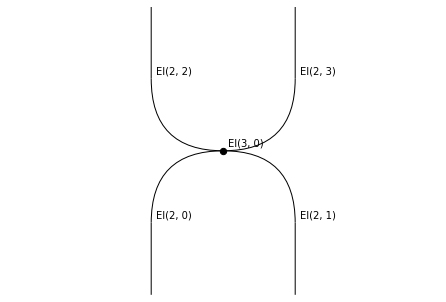

In [6]:
tetrahedron = rewalt.Shape.simplex(3)
tetrahedron.draw()

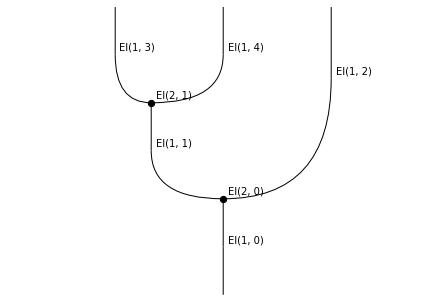

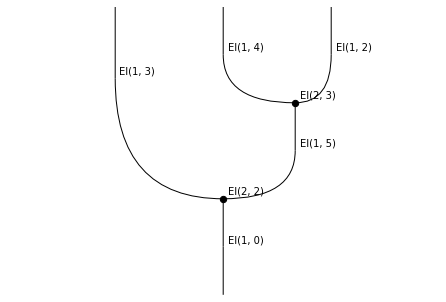

In [7]:
tetrahedron.draw_boundaries()

If we stick to the interpretation of the oriented 2-simplex as "the shape of a comultiplication", then the oriented 3-simplex is "the shape of a (co)associativity equation", or "the shape of a coassociator"!

What happens if we go to dimension 4?

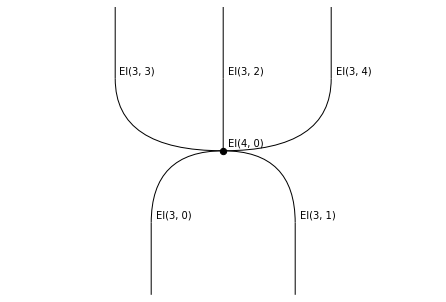

In [8]:
pentachoron = rewalt.Shape.simplex(4)
pentachoron.draw()

This is a *pentachoron*, also known as the [5-cell](https://en.wikipedia.org/wiki/5-cell), with three output tetrahedral faces and two input tetrahedral faces.

Let's see what its boundaries look like, starting from the input.

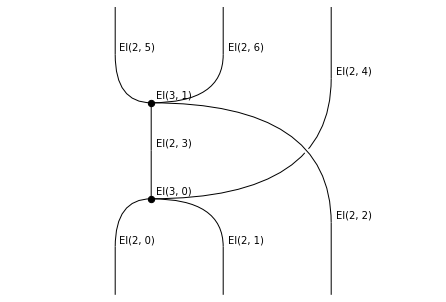

In [9]:
penta_input = pentachoron.input
penta_input.draw()

This is a slice of a 3-dimensional diagram with two 3-dimensional cells. 

This is still hard to visualise directly in three dimensions; instead, we are going to try to visualise it as a *sequence of rewrites on 2-dimensional diagrams*.

For that purpose, we use the `generate_layering` method, which creates a "layering" of a diagram into a sequence of rewrites, one for each one of its top-dimensional cells. Then, we can

- get a list of the layers with the `layers` attribute, or
- get a list of the corresponding "rewrite steps" with the `rewrite_steps` attribute.

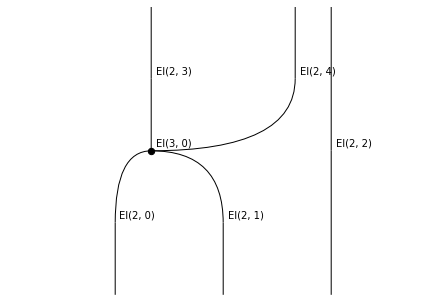

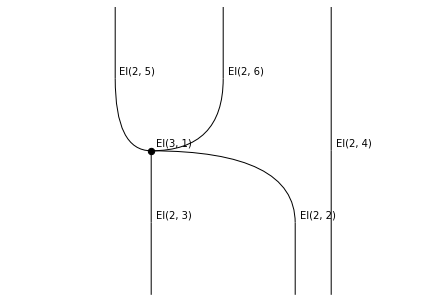

In [10]:
penta_input.generate_layering()
rewalt.strdiags.draw(*penta_input.layers)

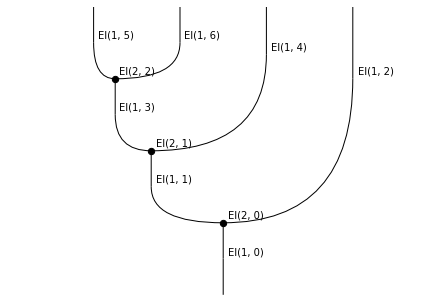

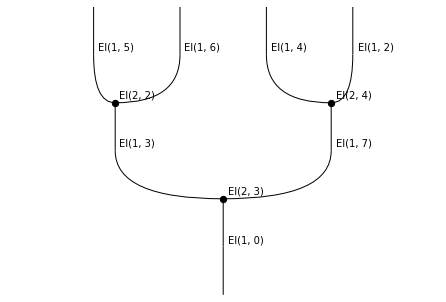

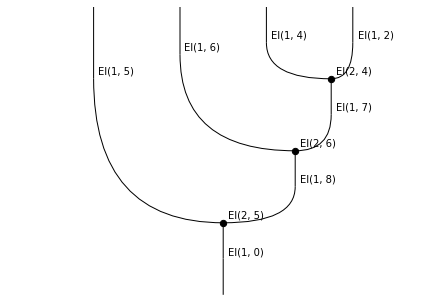

In [11]:
rewalt.strdiags.draw(*penta_input.rewrite_steps)

So, we can see that

- first the 3-dimensional face `El(3, 0)` "rewrites" the triangles `El(2, 0)` and `El(2, 1)` into the triangles `El(2, 3)` and `El(2, 4)`,
- then the 3-dimensional face `El(3, 1)` "rewrites" the triangles `El(2, 2)` and `El(2, 3)` into the triangles `El(2, 5)` and `El(2, 6)`.

We can also create a gif "movie" of the rewrite steps (and make it loop so it doesn't stop too soon).

In [12]:
rewalt.strdiags.to_gif(
    *penta_input.rewrite_steps,
    loop=True, path='simplicescubes_1.gif')

![PentaInput](simplicescubes_1.gif 'The input of the oriented 4-simplex, as a rewrite sequence.')

Now, let's look at the output boundary of the oriented 4-simplex.

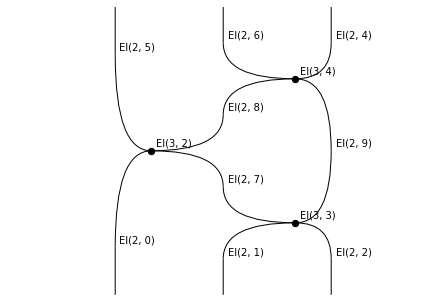

In [13]:
penta_output = pentachoron.output
penta_output.draw()

This is the slice of a 3-dimensional diagram with three 3-dimensional cells. Let's proceed as with the input.

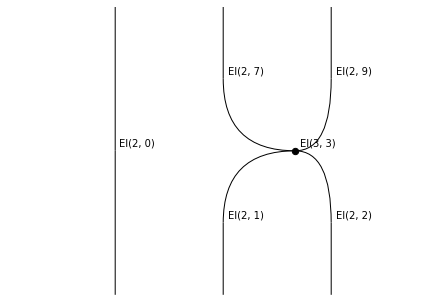

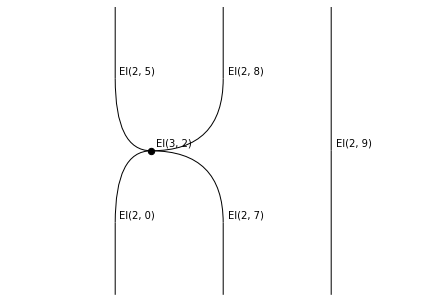

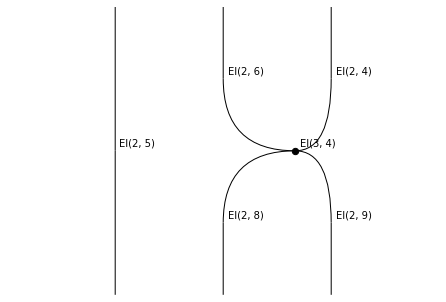

In [14]:
penta_output.generate_layering()
rewalt.strdiags.draw(*penta_output.layers)

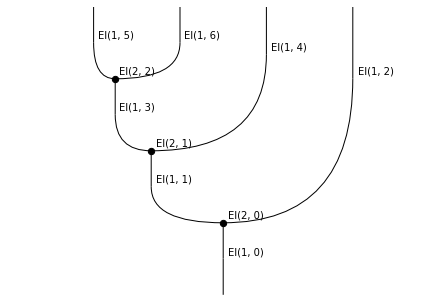

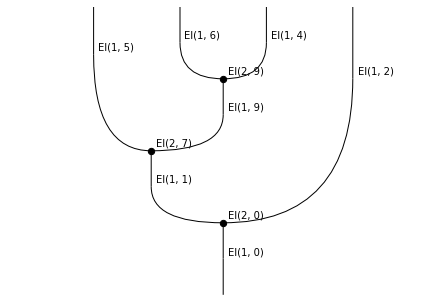

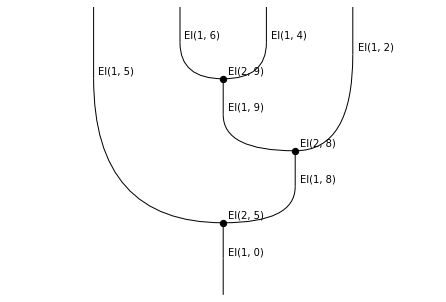

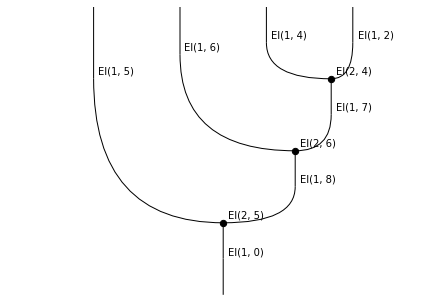

In [15]:
rewalt.strdiags.draw(*penta_output.rewrite_steps)

Let's also make a movie of these.

In [16]:
rewalt.strdiags.to_gif(
    *penta_output.rewrite_steps, loop=True,
    path='simplicescubes_2.gif')

![PentaOutput](simplicescubes_2.gif 'The output of the oriented 4-simplex, as a rewrite sequence.')

The two sides of the oriented 4-simplex are, in fact, the two sides of an equation dual to *Mac Lane's pentagon*! These were featured at the end of [this other notebook](monoids.html).

## Maps of simplices

So far we have only looked at the oriented simplices "in isolation". Let's see how we can use `rewalt` to understand their face and degeneracy maps.

Faces are quite simple; let's look at the example of the 2-simplex. This has 3 faces.

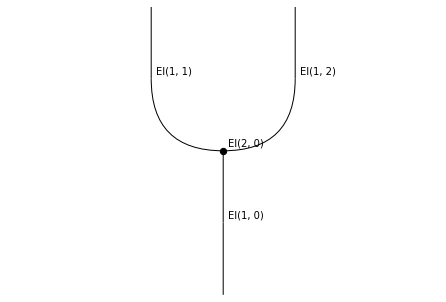

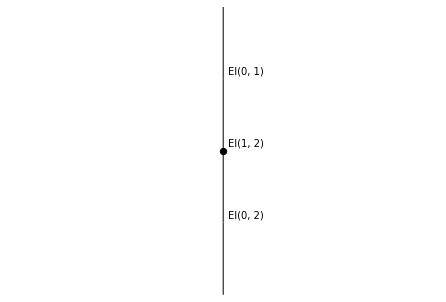

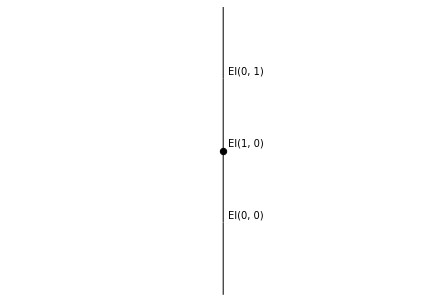

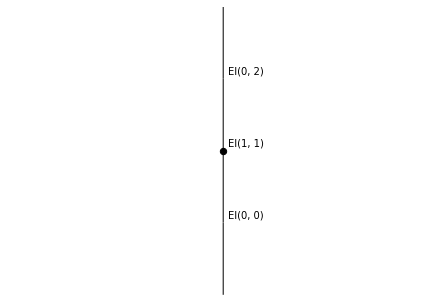

In [17]:
triangle.draw()
for n in range(3):
    triangle.simplex_face(n).draw()

By comparing labels, we can see that

- the 0th face of the 2-simplex is the *rightmost* output,
- the 1st face of the 2-simplex is the only input, and
- the 2nd face of the 2-simplex is the *leftmost* output.

In general, the faces of an oriented simplex alternate between inputs and outputs, always starting with an output at index 0.

Let's look at degeneracies; these are somewhat more interesting. There are two degeneracies on the 1-simplex.

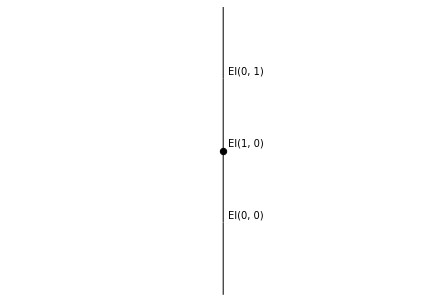

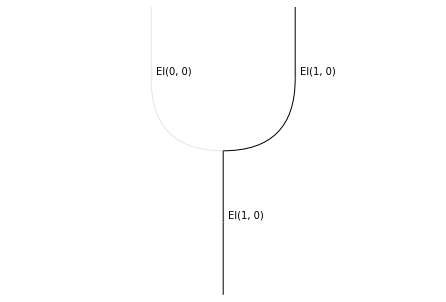

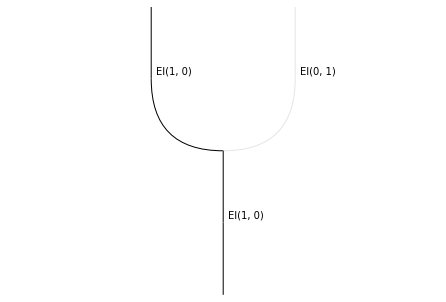

In [18]:
arrow.draw()
for n in range(2):
    arrow.simplex_degeneracy(n).draw()

The two diagrams represent two surjective ("collapsing") maps from the 2-simplex to the 1-simplex. The string diagrams tell us that

- the 0th degeneracy sends the 2-cell, its input, and the *rightmost* output of the 2-simplex onto the 1-cell of the 1-simplex, and collapses the *leftmost* output onto its input 0-cell;
- the 1st degeneracy sends the 2-cell, its input, and the *leftmost* output of the 2-simplex onto the 1-cell of the 1-simplex, and collapses the *rightmost* output onto its output 0-cell.

Now, let's take a look at one degeneracy of the 2-simplex.

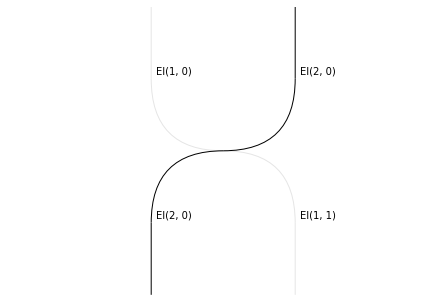

In [19]:
triangle.simplex_degeneracy(0).draw()

This represents a collapsing map from the 3-simplex onto the 2-simplex; the string diagram tells us which input and which output of the 3-simplex are collapsed, and which are sent to the 2-cell of the 2-simplex.

Let's get some more information by looking at the boundaries.

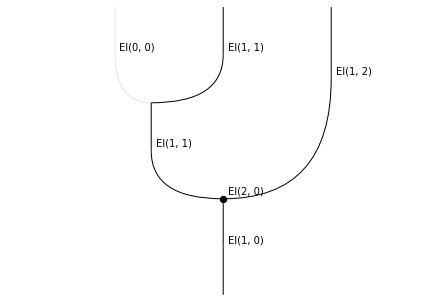

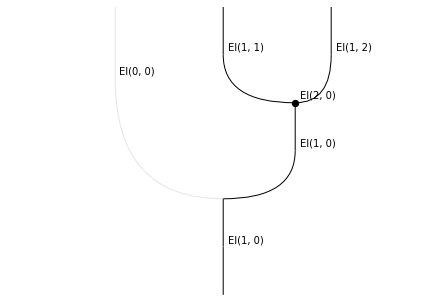

In [20]:
triangle.simplex_degeneracy(0).draw_boundaries()

This tells us exactly how the two collapsed 2-dimensional faces of the 3-simplex are collapsed: we can tell that, in both cases, it is the leftmost output that is collapsed, hence the *0-th* degeneracy of the 1-simplex is used.

## Oriented cubes

Let's move on to *cubes* for a bit; these can be obtained with the `Shape.cube` constructor. Unlike for simplices, there is no (-1)-cube. The 0-cube and the 1-cube are, in fact, the same as the 0-simplex and the 1-simplex.

In [21]:
assert point == rewalt.Shape.cube(0)
assert arrow == rewalt.Shape.cube(1)

So the first interesting case is the oriented 2-cube: this is a square with two output faces, and two input faces.

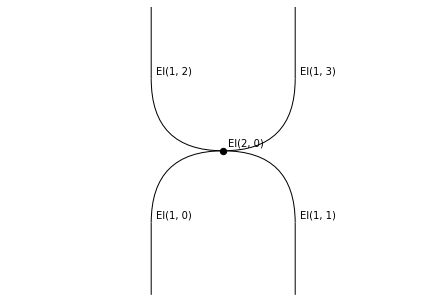

In [22]:
square = rewalt.Shape.cube(2)
square.draw()

Next, the oriented 3-cube has three output faces and three input faces. In fact, the oriented n-cube always has n inputs and n outputs.

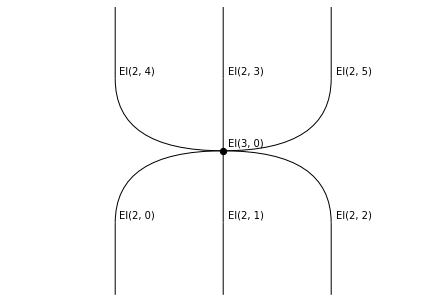

In [23]:
cube = rewalt.Shape.cube(3)
cube.draw()

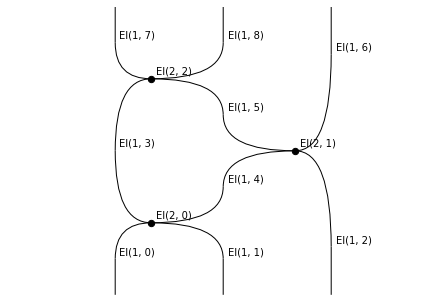

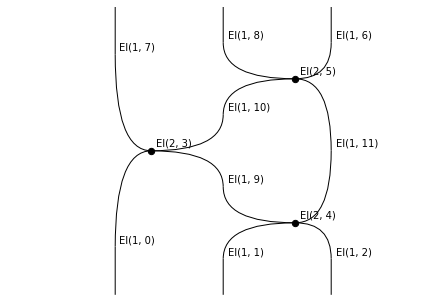

In [24]:
cube.draw_boundaries()

You may see the 2-dimensional boundaries of the oriented 3-cube, in string diagrams, as the shapes of the two sides of the [Yang-Baxter equation](https://en.wikipedia.org/wiki/Yang%E2%80%93Baxter_equation), or the two sides of the third [Reidemeister move](https://ncatlab.org/nlab/show/Reidemeister+move).

Let's move on to the 4-dimensional cube.

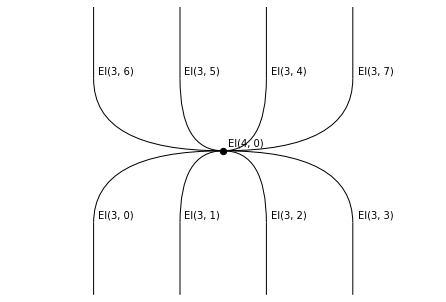

In [25]:
tesseract = rewalt.Shape.cube(4)
tesseract.draw()

As expected, it has four input faces and four output faces. Let's proceed as we did with the 4-simplex to understand what is happening.

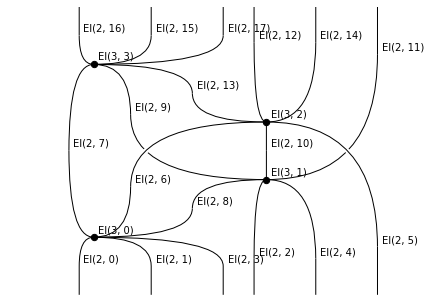

In [26]:
tess_input = tesseract.input
tess_input.draw()

The picture is a bit too crowded with all those labels... let's deactivate wire labels.

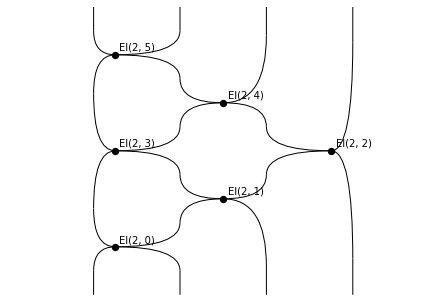

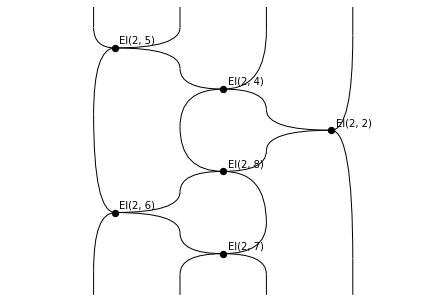

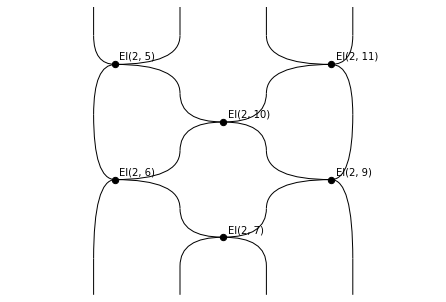

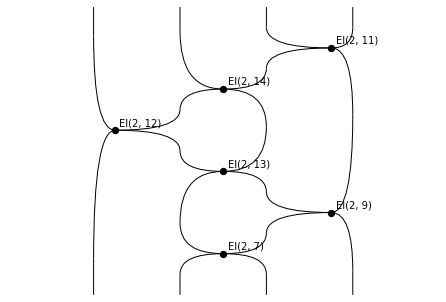

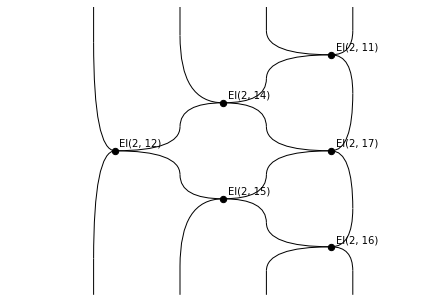

In [27]:
tess_input.generate_layering()
rewalt.strdiags.draw(*tess_input.rewrite_steps, wirelabels=False)

Now we turn the sequence of rewrite steps into a gif.

In [28]:
rewalt.strdiags.to_gif(
    *tess_input.rewrite_steps, loop=True,
    timestep=1000,
    wirelabels=False,
    path='simplicescubes_3.gif')

![TessInput](simplicescubes_3.gif 'The input of the oriented 4-cube, as a rewrite sequence.')

Next we focus on the output of the 4-cube.

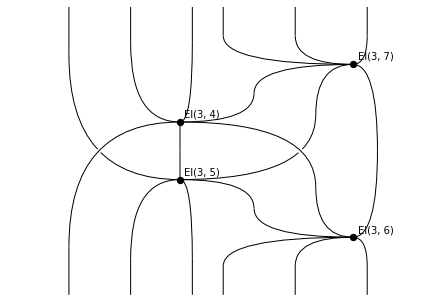

In [29]:
tess_output = tesseract.output
tess_output.draw(wirelabels=False)

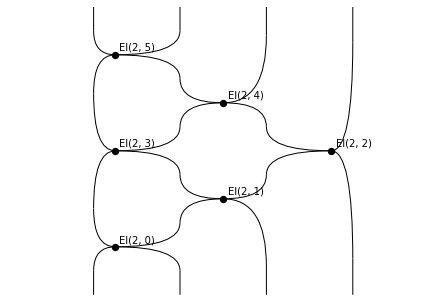

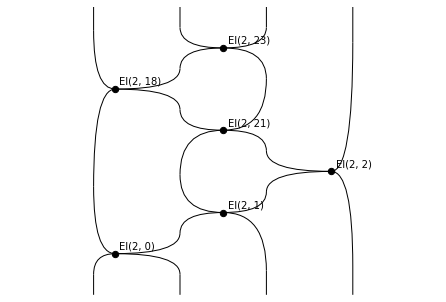

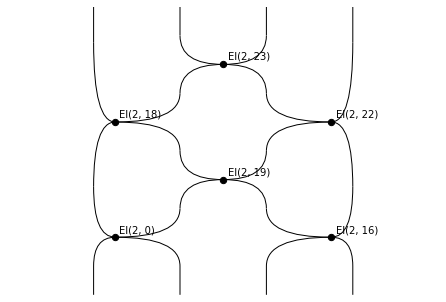

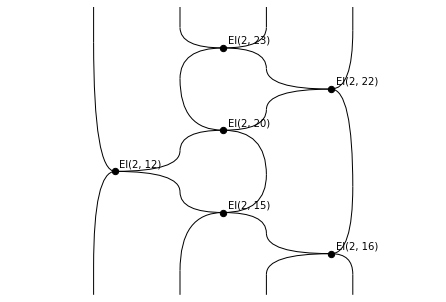

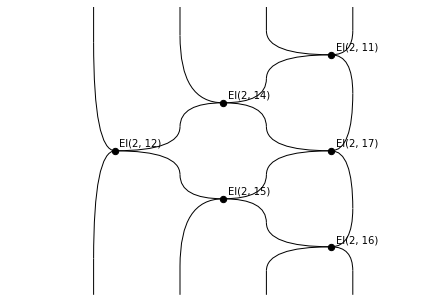

In [30]:
tess_output.generate_layering()
rewalt.strdiags.draw(*tess_output.rewrite_steps, wirelabels=False)

In [31]:
rewalt.strdiags.to_gif(
    *tess_output.rewrite_steps, loop=True,
    timestep=1000,
    wirelabels=False,
    path='simplicescubes_4.gif')

![TessOutput](simplicescubes_4.gif 'The output of the oriented 4-cube, as a rewrite sequence.')

In the two rewrite sequences corresponding to the input and output boundary of the 4-cube, you may recognise the shapes of the two sides of the [Zamolodchikov tetrahedron equation](https://arxiv.org/abs/math/0307263).

(Why tetrahedron if this is a 4-cube? Not sure!)